## Emotion Recognition Using Text


In [60]:
import pandas as pd
import numpy as np

In [61]:
data = pd.read_csv('text_emotion.csv')

In [62]:
data = data.drop(data[data.sentiment == 'anger'].index) 
data = data.drop(data[data.sentiment == 'boredom'].index) 
data = data.drop(data[data.sentiment == 'enthusiasm'].index)
data = data.drop(data[data.sentiment == 'empty'].index)
data = data.drop(data[data.sentiment == 'fun'].index)
data = data.drop(data[data.sentiment == 'relief'].index)
data = data.drop(data[data.sentiment == 'surprise'].index)
data = data.drop(data[data.sentiment == 'love'].index)
data = data.drop(data[data.sentiment == 'hate'].index)
data = data.drop(data[data.sentiment == 'worry'].index)

In [63]:
data['sentiment'].value_counts() 

neutral      8638
happiness    5209
sadness      5165
Name: sentiment, dtype: int64

In [64]:
#Making all letters lowercase
data['content'] = data['content'].apply(lambda x: " ".join(x.lower() for x in x.split())) 

In [65]:
#Removing Punctuation, Symbols
data['content'] = data['content'].str.replace('[^\w\s]',' ')

C:\Users\HP\AppData\Local\Temp/ipykernel_13876/271376101.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  data['content'] = data['content'].str.replace('[^\w\s]',' ')


In [66]:
!pip install nltk 
#install nltk(natural language toolkit) It is a Python programming environment for creating applications for statistical natural language processing (NLP).
# #For tokenization, parsing, classification, stemming, tagging, and semantic reasoning, it includes text processing libraries.

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [67]:
#Removing Stop Words using NLTK
from nltk.corpus import stopwords 

In [68]:
stop = stopwords.words('english') #stopwords from nltk
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #removing stopwords from data using nltk stopwords library and applying it to the dataframe

It is the analysis of textual data utilising a variety of tools and methods. We must analyse the text in order to extract certain crucial data and the text's numerical properties before passing it along to a machine learning model. An open-source Python module called Textblob is used to process textual data.

In [69]:
!pip install textblob 

You should consider upgrading via the 'C:\Users\HP\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [70]:
from textblob import Word #importing Word from textblob library for sentiment analysis 

In [71]:
import nltk #importing nltk library for sentiment analysis
nltk.download('omw-1.4') #downloading nltk library for sentiment analysis

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [72]:
data['content'] = data['content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()])) #lemmatizing the data using textblob library for sentiment analysis

Regex is a syntax and used to locate, extract, and modify particular string patterns within a larger text. It is frequently employed in projects involving text mining, NLP, and text validation.

In [73]:
import re #importing re library for sentiment analysis

In [74]:
def de_repeat(text):   #function to remove repeating characters
    pattern = re.compile(r"(.)\1{2,}") #pattern to remove repeating characters
    return pattern.sub(r"\1\1", text) #replacing repeating characters with the first character

In [75]:
data['content'] = data['content'].apply(lambda x: " ".join(de_repeat(x) for x in x.split())) #applying the function to the dataframe

In [76]:
freq = pd.Series(' '.join(data['content']).split()).value_counts()[-10000:]    #frequency of the most common words

In [77]:
freq = list(freq.index)
data['content'] = data['content'].apply(lambda x: " ".join(x for x in x.split() if x not in freq)) #removing the most common words from the dataframe

In [78]:
from sklearn.preprocessing import LabelEncoder #importing LabelEncoder from sklearn library for sentiment analysis

datasets with many labels in a single or several columns. These labels may be written in words or represented by numbers. To make the data clear or in a form that is readable by humans

In [79]:
le = LabelEncoder() #creating an object of LabelEncoder

In [80]:
y = le.fit_transform(data.sentiment.values) #fitting the data to the LabelEncoder object

In [81]:
from sklearn.model_selection import train_test_split #importing train_test_split from sklearn library for sentiment analysis

In [82]:
X_train, X_val, y_train, y_val = train_test_split(data.content.values, y, random_state=42, test_size=0.5) #splitting the data into training and validation sets

In [83]:
from sklearn.feature_extraction.text import CountVectorizer #importing CountVectorizer from sklearn library for sentiment analysis


A collection of text documents can be converted into a vector of term/token counts using the vectorizer application. Additionally, it makes it possible to pre-process text data before creating the vector representation. This method is referred to as feature extraction (or vectorization).

In [84]:
count_vect = CountVectorizer(analyzer='word') #creating an object of CountVectorizer

In [85]:
count_vect.fit(data['content']) #fitting the data to the CountVectorizer object

CountVectorizer()

In [86]:
X_train_count =  count_vect.transform(X_train) #transforming the training data into a count matrix
X_val_count =  count_vect.transform(X_val) #transforming the validation data into a count matrix

In [87]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix #importing accuracy_score and plot_confusion_matrix from sklearn library for sentiment analysis

In [88]:
from sklearn.linear_model import SGDClassifier #importing SGDClassifier from sklearn library for sentiment analysis

In [89]:
lsvm = SGDClassifier(alpha=0.001, random_state=5, max_iter=15, tol=None) #creating an object of SGDClassifier

In [90]:
lsvm.fit(X_train_count, y_train) #fitting the training data to the SGDClassifier object

SGDClassifier(alpha=0.001, max_iter=15, random_state=5, tol=None)

In [91]:
lvsm_pred = lsvm.predict(X_val_count) #predicting the validation data using the SGDClassifier object

In [92]:
print('svm using count accuracy %s' % accuracy_score(lvsm_pred, y_val)) #printing the accuracy of the model

svm using count accuracy 0.6055123080159899


In [93]:
from sklearn.linear_model import LogisticRegression #importing LogisticRegression from sklearn library for sentiment analysis

In [94]:
lr = LogisticRegression(C=1) #creating an object of LogisticRegression

In [95]:
lr.fit(X_train_count, y_train) #fitting the training data to the LogisticRegression object

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [96]:
lr_preds = lr.predict(X_val_count) #predicting the validation data using the LogisticRegression object

In [97]:
print('lr using count accuracy %s' % accuracy_score(lr_preds, y_val)) #printing the accuracy of the model

lr using count accuracy 0.5945718493583


In [98]:
from sklearn.tree import DecisionTreeClassifier #importing DecisionTreeClassifier from sklearn library for sentiment analysis

In [99]:
dt = DecisionTreeClassifier() #creating an object of DecisionTreeClassifier

In [100]:
dt.fit(X_train_count, y_train) #fitting the training data to the DecisionTreeClassifier object

DecisionTreeClassifier()

In [101]:
dt_preds = dt.predict(X_val_count) #predicting the validation data using the DecisionTreeClassifier object

In [102]:
print('dt using count accuracy %s' % accuracy_score(dt_preds, y_val)) #printing the accuracy of the model

dt using count accuracy 0.5351357037660425


In [103]:
from sklearn.ensemble import RandomForestClassifier #importing RandomForestClassifier from sklearn library for sentiment analysis

In [104]:
rf = RandomForestClassifier() #creating an object of RandomForestClassifier

In [105]:
rf.fit(X_train_count, y_train) #fitting the training data to the RandomForestClassifier object

RandomForestClassifier()

In [106]:
rf_preds = rf.predict(X_val_count) #predicting the validation data using the RandomForestClassifier object

In [107]:
print("rf using count accuracy %s" % accuracy_score(rf_preds, y_val)) #printing the accuracy of the model

rf using count accuracy 0.5832106038291606


In [108]:
from sklearn.naive_bayes import MultinomialNB #importing MultinomialNB from sklearn library for sentiment analysis

In [109]:
nb = MultinomialNB() #creating an object of MultinomialNB

In [110]:
nb.fit(X_train_count, y_train) #fitting the training data to the MultinomialNB object

MultinomialNB()

In [111]:
nb_preds = nb.predict(X_val_count) #predicting the validation data using the MultinomialNB object

In [112]:
print("nb using count accuracy %s" % accuracy_score(nb_preds, y_val)) #printing the accuracy of the model

nb using count accuracy 0.5617504733852304


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


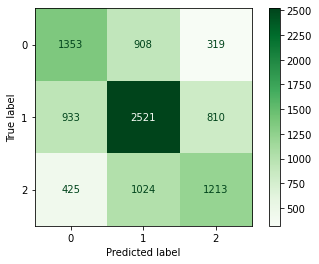

In [113]:
plot_confusion_matrix(dt, X_val_count, y_val, cmap='Greens') #plotting the confusion matrix of the model

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


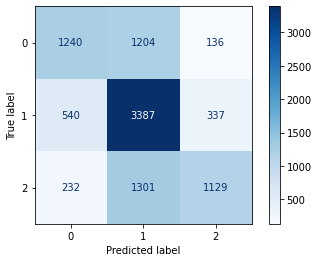

In [114]:
plot_confusion_matrix(lsvm, X_val_count, y_val, cmap='Blues') #plotting the confusion matrix of the model(linear support vector  machine)

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


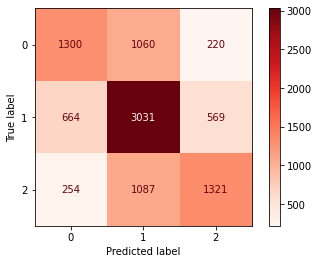

In [115]:
plot_confusion_matrix(lr, X_val_count, y_val, cmap='Reds') #plotting the confusion matrix of the model

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


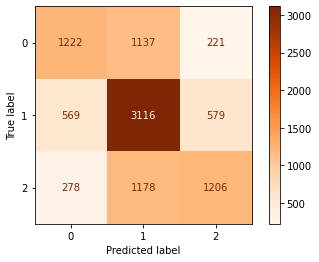

In [116]:
plot_confusion_matrix(rf, X_val_count, y_val, cmap='Oranges') #plotting the confusion matrix of the model

c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


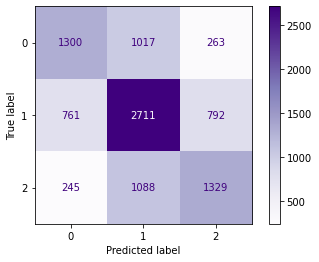

In [117]:
plot_confusion_matrix(nb, X_val_count, y_val, cmap='Purples') #plotting the confusion matrix of the model

In [118]:
tweets = pd.DataFrame(['I am very happy today! The atmosphere looks cheerful',
'Things are looking great. It was such a good day',
'Success is right around the corner. Lets celebrate this victory',
'Everything is more beautiful when you experience them with a smile!',
'Now this is my worst, okay? But I am gonna get better.',
'I am tired, boss. Tired of being on the road, lonely as a sparrow in the rain. I am tired of all the pain I feel',
'This is quite depressing. I am filled with sorrow',
'His death broke my heart. It was a sad day'])

# Doing some preprocessing on these tweets as done before 
tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets[0] = tweets[0].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
from textblob import Word
tweets[0] = tweets[0].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

# Extractsing Count Vectors feature from our tweets
tweet_count = count_vect.transform(tweets[0])

#Predicting the emotion of the tweet using our already trained linear SVM
tweet_pred = lsvm.predict(tweet_count)
print(tweet_pred)
## result 
## [0 0 0 0 1 1 1 1]  
### 0 = happy, 1 = sad, 2 = neutral

[0 0 1 0 1 2 1 2]


C:\Users\HP\AppData\Local\Temp/ipykernel_13876/871377218.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets[0] = tweets[0].str.replace('[^\w\s]',' ')
